# Exploring the evolution of LEGO - Data Analysis

Lego is a household name across the world, supported by a diverse toy line, hit movies, and a series of successful video games. In this project, we are going to explore a key development in the history of Lego: the introduction of licensed sets such as Star Wars, Super Heroes, and Harry Potter. The two datasets I will be using are shown below:

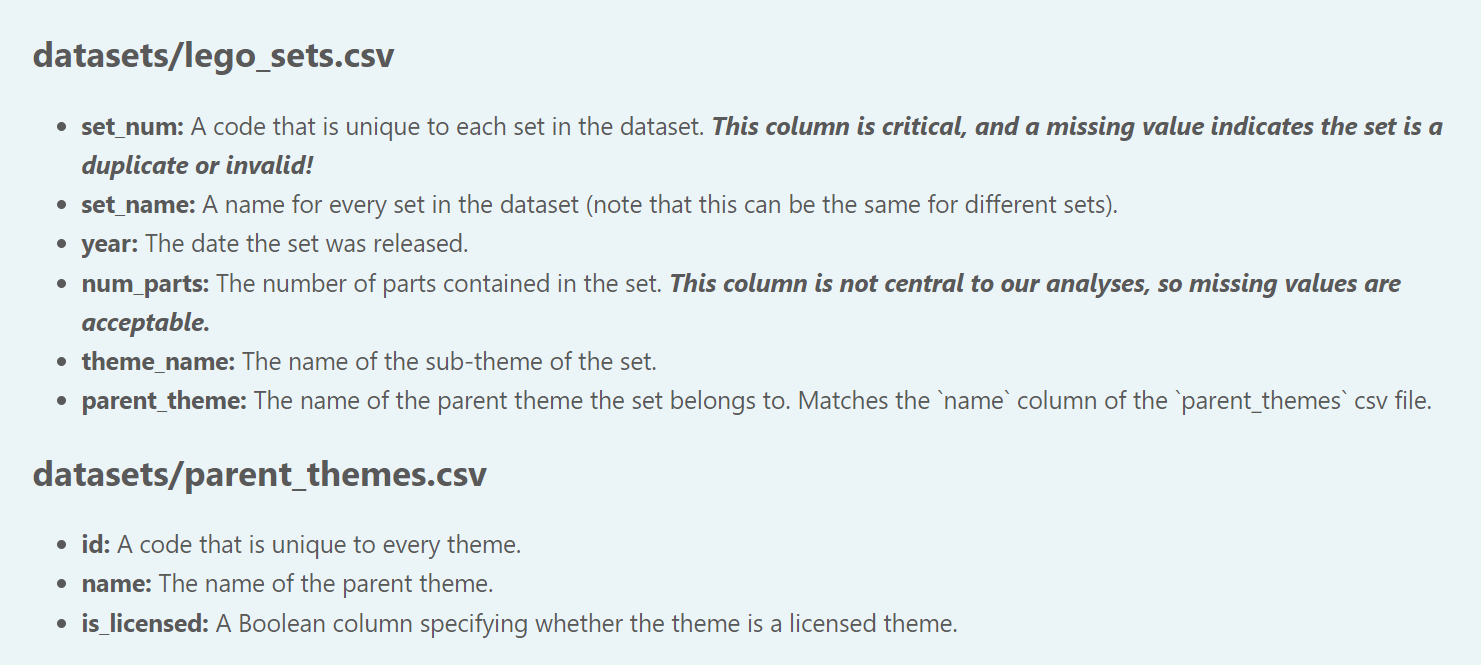

### Importing libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the data

In [22]:
sets=pd.read_csv(r"C:\Users\rache\OneDrive\Desktop\Projects\Python\LEGO data\lego_sets.csv")
sets.head(10)

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space
5,0014-1,Space Mini-Figures,1979,12.0,Supplemental,Space
6,0015-1,Space Mini-Figures,1979,NaN,Supplemental,Space
7,0016-1,Castle Mini Figures,1978,NaN,Castle,Castle
8,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland
9,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland


In [24]:
themes = pd.read_csv(r"C:\Users\rache\OneDrive\Desktop\Projects\Python\LEGO data\parent_themes.csv")
themes.head(10)

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False
5,147,Pirates,False
6,155,Modular Buildings,False
7,158,Star Wars,True
8,186,Castle,False
9,204,Designer Sets,False


#### Check Datatype of Each Column

In [28]:
sets.dtypes

set_num          object
name             object
year              int64
num_parts       float64
theme_name       object
parent_theme     object
dtype: object

In [29]:
themes.dtypes

id              int64
name           object
is_licensed      bool
dtype: object

### Question 1: What percentage of all licensed sets ever released were Star Wars Themed?

In [34]:
#lets join the two data sets

merged = sets.merge(themes, left_on = 'parent_theme', right_on = 'name')
merged.drop(columns = 'name_y', inplace=True)
merged.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,False


In [45]:
#getting rid of null values (set_num column)

merged[merged['set_num'].isnull()].shape
merged = merged.dropna(subset='set_num')
merged.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,False


In [46]:
# New data frame with only licensed lego sets
licensed = merged[merged['is_licensed']==True]
licensed.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
3494,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3495,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
3496,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
3497,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True


In [47]:
# data frame with licensed lego sets where the parent theme is 'Star Wars'

star_wars = licensed[licensed['parent_theme']=='Star Wars']
star_wars.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
3494,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3495,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
3496,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
3497,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True


In [53]:
#Now, we want the percentage of Star Wars themed sets that were licensed

star_wars.shape[0]
licensed.shape[0]

the_force = int(star_wars.shape[0]/licensed.shape[0]*100)
print(the_force)

#ANSWER: The percentage of licensed sets that were Star Wars themed is 51%

51


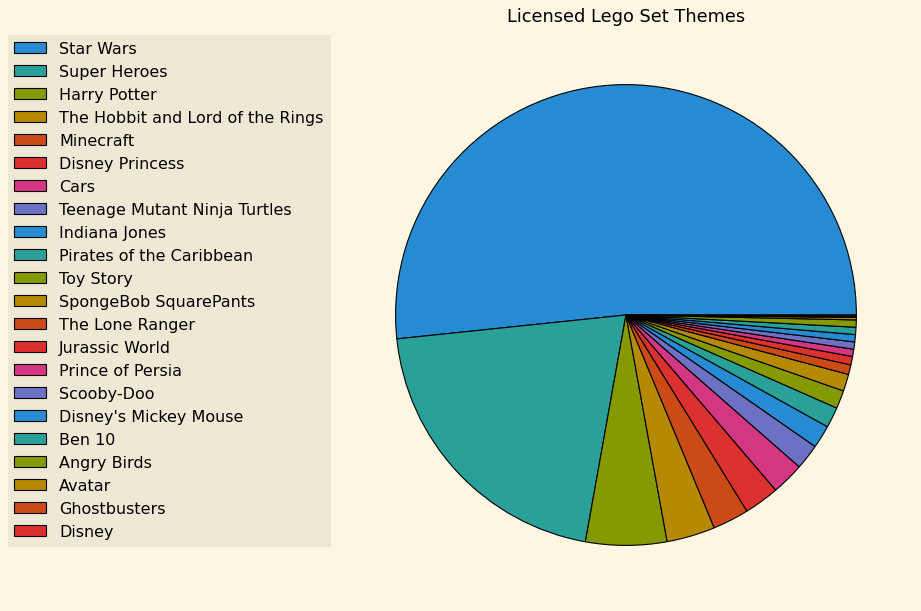

In [217]:
#pie chart
counts = licensed.groupby('parent_theme').count()
counts.sort_values('id', ascending=False, inplace=True)
x = counts['id']
#labels= counts[('parent_theme')]
plt.style.use('Solarize_Light2')

counts.plot.pie(y='id', figsize=(10,9), labeldistance=None, title='Licensed Lego Set Themes')
plt.legend(loc="upper right", bbox_to_anchor=(0,1))

### Question 2: In which year was Star Wars NOT the most popular licensed theme?

In [64]:
licensed_sorted = licensed.sort_values('year')
licensed_sorted['count']=1

summed_df = licensed_sorted.groupby(['year','parent_theme']).sum().reset_index()

#Only returning the max count from each year
max_df = summed_df.sort_values('count', ascending=False).drop_duplicates('year')

max_df.sort_values('year')

C:\Users\rache\AppData\Local\Temp\ipykernel_19972\3419931059.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  summed_df = licensed_sorted.groupby(['year','parent_theme']).sum().reset_index()


,year,parent_theme,num_parts,id,is_licensed,count
0,1999,Star Wars,1384.0,2054,13,13
2,2000,Star Wars,2580.0,4108,26,26
4,2001,Star Wars,2949.0,2212,14,14
6,2002,Star Wars,4735.0,4424,28,28
9,2003,Star Wars,6660.0,5056,32,32
12,2004,Star Wars,1659.0,3160,20,20
16,2005,Star Wars,4730.0,4424,28,28
20,2006,Star Wars,2769.0,1738,11,11
24,2007,Star Wars,11361.0,2528,16,16
28,2008,Star Wars,6865.0,3634,23,23


In [65]:
year=2017

#ANSWER: The year the Star Wars was NOT the most popular theme was in 2017

### Question 3: How many unique sets were released each year (1955-2017)?

In [233]:
unique_sets = merged
unique_sets.head()
unique_sets['count']=1

sets_per_year = unique_sets.groupby(['year']).sum().reset_index()[['year','count']]
sets_per_year.head(10)

C:\Users\rache\AppData\Local\Temp\ipykernel_19972\2905181143.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sets_per_year = unique_sets.groupby(['year']).sum().reset_index()[['year','count']]


,year,count
0,1950,7
1,1953,4
2,1954,14
3,1955,28
4,1956,12
5,1957,21
6,1958,42
7,1959,4
8,1960,3
9,1961,17


In [244]:
import seaborn as sns

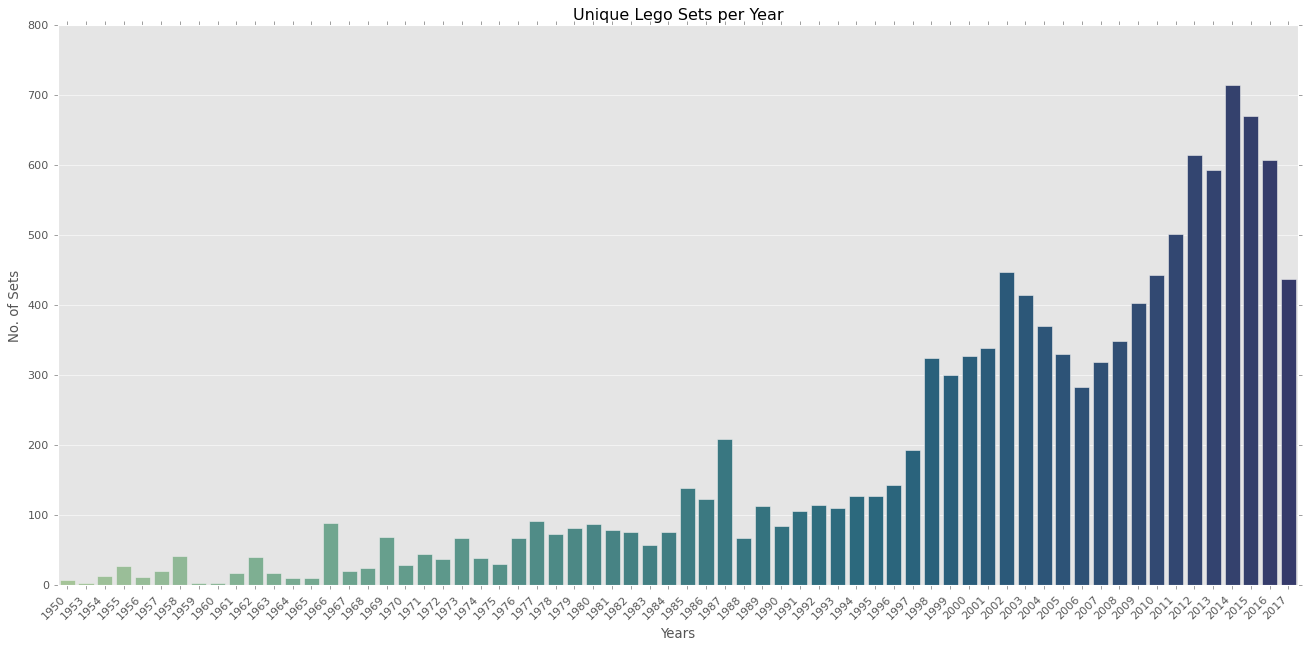

In [280]:
year = sets_per_year['year']
count = sets_per_year['count']
count.head()

fig, ax = plt.subplots(figsize=(20, 10))
sns.color_palette("Paired")

sns.barplot(x = 'year',y = 'count',data = sets_per_year, ax=ax, palette=('crest'))

plt.title('Unique Lego Sets per Year')
plt.xlabel('Years')
plt.ylabel('No. of Sets')
fig.autofmt_xdate(rotation=45)